In [102]:
# install Medium Enhanced Stats chrome extension
# https://chrome.google.com/webstore/detail/medium-enhanced-stats/jnomnfoenpdinfkpaaigokicgcfkomjo?hl=en
# export stats to csv
# rename downloaded file to "medium.csv"

import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

# filter columns on read
_df = pd.read_csv(
    "medium.csv",
    delimiter=";",
    usecols=["title", "firstPublishedAt", "readingTime", "views", "reads", "claps"],
)

# filter reading time > 1.0
_df = _df[_df["readingTime"] > 1.0]

# convert collectedAt column from epoch to datetime
_df["firstPublishedAt"] = pd.to_datetime(_df["firstPublishedAt"], unit="ms")

# group by year and compute sum and create a column for count of groups
df = _df.groupby(_df["firstPublishedAt"].dt.year).agg(
    {
        "views": "sum",
        "reads": "sum",
        "claps": "sum",
        "firstPublishedAt": "count",
        "readingTime": "mean",
    }
)

# rename index to year
df.index.name = "year"

# rename firstPublishedAt to count
df = df.rename(columns={"firstPublishedAt": "count"})

# no comma and no decimal places with pd styles
pd.options.display.float_format = "{:,.0f}".format

df

,views,reads,claps,count,readingTime
year,,,,,
2019,"262,814","76,298","5,656",16,6
2020,"1,210,294","193,501","12,358",27,9
2021,"165,726","34,235","5,077",23,8
2022,"55,080","7,115","2,034",18,7


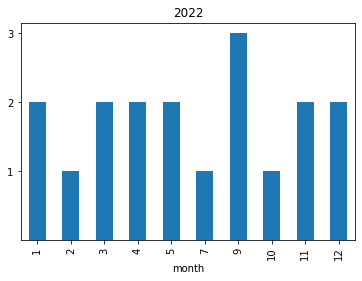

In [93]:
# create a bar chart of counts grouped by months for the year 2022
_df[_df["firstPublishedAt"].dt.year == 2022].groupby(_df["firstPublishedAt"].dt.month).agg({"firstPublishedAt": "count"}).plot(
    kind="bar", title="2022", legend=False, xlabel="month", yticks=range(1, 4)
);

In [103]:
def top_five(year: int) -> pd.DataFrame:
    """Return top five articles for a given year."""
    return (
        _df[_df["firstPublishedAt"].dt.year == year]
        .sort_values(by=["views"], ascending=False)
        .head(5)[["title", "views", "reads", "claps"]]
        .reset_index(drop=True)
    )

In [96]:
top_five(2020)

,title,views,reads,claps
0,Top 20 Must-Watch Artificial Intelligence movies,"212,858","23,103",252
1,Top 25 websites for coding challenge and compe...,"212,792","23,710",852
2,"Top 20 free Data Science, ML and AI MOOCs on t...","202,698","35,217","2,912"
3,The Best book to Start your Data Science Journey,"109,176","31,116","2,046"
4,Top 20 Data Science Discord servers to join in...,"80,499","10,230",273


In [97]:
top_five(2021)

,title,views,reads,claps
0,Building an Image Classification model with Py...,"31,970","4,617",287
1,5 Computer Vision Trends for 2021,"21,551","7,016",881
2,Ethereum Price Prediction with Python,"18,761","4,132",274
3,Data Cleaning with Python,"16,472","2,849",222
4,Using Data Science to Predict Viral Tweets,"15,017","1,387",352


In [104]:
top_five(2022)

,title,views,reads,claps
0,Predicting Rain with Machine Learning,"16,465","1,550",163
1,40 Useful Pandas Snippets,"9,204","1,008",352
2,Python F-strings Tricks You Should Know,"8,927","1,940",786
3,Top Machine Learning Frameworks used by Data S...,"6,229",827,102
4,Bird Species Classification with Machine Learning,"4,620",353,96


In [16]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

# filter columns on read
df = pd.read_csv(
    "mngs-posts-data.csv",
    usecols=["claps", "reads", "views", "earnings", "followers", "collectedAt"],
)

# convert collectedAt column from epoch to datetime
df["collectedAt"] = pd.to_datetime(df["collectedAt"], unit="ms")

# group by year and compute sum
df = df.groupby(df["collectedAt"].dt.year).sum()

df.index.name = "year"

# no decimal places and add comma for all columns except earnings
df[["claps", "reads", "views", "followers"]] = df[["claps", "reads", "views", "followers"]].apply( lambda x: x.astype(int).apply(lambda x: "{:,}".format(x)))

# add dollar sign and round to no decimal places for earnings
df["earnings"] = df["earnings"].apply(lambda x: "${:,.0f}".format(x))

# Generate an HTML table from the DataFrame
df

,claps,reads,views,followers,earnings
year,,,,,
2019,"2,665","17,284","51,603",0,$727
2020,"13,856","204,164","868,617",514,"$4,713"
2021,"5,351","58,788","454,210","1,560","$1,353"
2022,"3,511","51,752","383,619","1,337",$571
2023,0,5,55,0,$0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a605a3e6-1564-47b2-94e7-842290ba7692' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>